## Imports

In [11]:
from autograd import Value, populate_dataframe, build_causal_graph, draw_computational_graph
import numpy as np
import pandas as pd
from shapflow.flow import GraphExplainer, CausalLinks, build_feature_graph
import os
import random
import inspect
from scipy.stats.mstats import zscore

## Equation

In [8]:
def co2_323_function(
        P, density, spg, volume, SiOSi_average, SiOSi_gmean, SiOSi_hmean, SiOSi_max, SiOSi_mean, SiOSi_min,
        SiOSi_skew, SiOSi_std, SiOSi_var, SiO_average, SiO_gmean, SiO_hmean, SiO_max, SiO_mean, SiO_min,
        SiO_skew, SiO_std, SiO_var, ASA, AV, NASA, NAV, VolFrac, largest_free_sphere, largest_included_sphere,
        largest_included_sphere_free, max_dim, min_dim, mode_dim, pld, lcd, void_frac, surf_area_m2g, surf_area_m2cm3
    ):
    Value.reset()

    # input variables
    P = Value(P, label='P')
    density = Value(density, label='density')
    spg = Value(spg, label='spg')
    volume = Value(volume, label='volume')
    SiOSi_average = Value(SiOSi_average, label='SiOSi_average')
    SiOSi_gmean = Value(SiOSi_gmean, label='SiOSi_gmean')
    SiOSi_hmean = Value(SiOSi_hmean, label='SiOSi_hmean')
    SiOSi_max = Value(SiOSi_max, label='SiOSi_max')
    SiOSi_mean = Value(SiOSi_mean, label='SiOSi_mean')
    SiOSi_min = Value(SiOSi_min, label='SiOSi_min')
    SiOSi_skew = Value(SiOSi_skew, label='SiOSi_skew')
    SiOSi_std = Value(SiOSi_std, label='SiOSi_std')
    SiOSi_var = Value(SiOSi_var, label='SiOSi_var')
    SiO_average = Value(SiO_average, label='SiO_average')
    SiO_gmean = Value(SiO_gmean, label='SiO_gmean')
    SiO_hmean = Value(SiO_hmean, label='SiO_hmean')
    SiO_max = Value(SiO_max, label='SiO_max')
    SiO_mean = Value(SiO_mean, label='SiO_mean')
    SiO_min = Value(SiO_min, label='SiO_min')
    SiO_skew = Value(SiO_skew, label='SiO_skew')
    SiO_std = Value(SiO_std, label='SiO_std')
    SiO_var = Value(SiO_var, label='SiO_var')
    ASA = Value(ASA, label='ASA')
    AV = Value(AV, label='AV')
    NASA = Value(NASA, label='NASA')
    NAV = Value(NAV, label='NAV')
    VolFrac = Value(VolFrac, label='VolFrac')
    largest_free_sphere = Value(largest_free_sphere, label='largest_free_sphere')
    largest_included_sphere = Value(largest_included_sphere, label='largest_included_sphere')
    largest_included_sphere_free = Value(largest_included_sphere_free, label='largest_included_sphere_free')
    max_dim = Value(max_dim, label='max_dim')
    min_dim = Value(min_dim, label='min_dim')
    mode_dim = Value(mode_dim, label='mode_dim')
    pld = Value(pld, label='pld')
    lcd = Value(lcd, label='lcd')
    void_frac = Value(void_frac, label='void_frac')
    surf_area_m2g = Value(surf_area_m2g, label='surf_area_m2g')
    surf_area_m2cm3 = Value(surf_area_m2cm3, label='surf_area_m2cm3')

    # constants
    beta1     = Value(2.491214660055224, label='beta1')
    beta2     = Value(-1.5263000635855446, label='beta2')
    beta3     = Value(-2.380734070171069, label='beta3')
    beta4     = Value(-9.472686455629983e-06, label='beta4')
    beta5     = Value(2.7272349373873714, label='beta5')
    beta6     = Value(-1.110269543429511, label='beta6')
    beta7     = Value(4.598133904458434, label='beta7')
    beta8     = Value(0.41918467042671564, label='beta8')
    beta9     = Value(1.3561371522860057, label='beta9')
    beta10    = Value(0.25063623373894434, label='beta10')
    beta11    = Value(2.3446256051528107, label='beta11')
    beta12    = Value(1.4145370797433214, label='beta12')
    beta13    = Value(1.332332199550355, label='beta13')
    beta14    = Value(-5.517880398071334, label='beta14')
    intercept = Value(0.0, label='intercept')

    # f terms
    f1 = (-pld).exp()*(-density).exp()/((void_frac)**2); f1.label = "f1"
    f2 = ((-NASA).exp())**2/largest_free_sphere.exp(); f2.label = "f2"
    f3 = 1/(-density).exp()/((surf_area_m2g)**2); f3.label = "f3"
    f4 = (-surf_area_m2cm3).exp()/((AV)**3)*void_frac.exp(); f4.label = "f4"
    f5 = (-largest_included_sphere_free).exp()*(-pld).exp()/((NAV)**2); f5.label = "f5"
    f6 = 1/(-largest_included_sphere_free).exp()/((void_frac)**2); f6.label = "f6"
    f7 = 1/(-VolFrac).exp()/((NAV)**2); f7.label = "f7"
    f8 = ASA.exp()/(-surf_area_m2g).exp(); f8.label = "f8"
    f9 = void_frac.exp()/(-spg).exp()*((NAV)**2); f9.label = "f9"
    f10 = ((NASA)**2)/NASA.exp()/((volume)**2); f10.label = "f10"
    f11 = AV.exp()/1/((surf_area_m2g)**2); f11.label = "f11"
    f12 = (-surf_area_m2cm3).exp()*pld.exp()*(-NASA).exp(); f12.label = "f12"
    f13 = ((surf_area_m2cm3)**2)*AV.exp()*((lcd)**2); f13.label = "f13"
    f14 = 1/(-surf_area_m2g).exp()/((NAV)**2); f14.label = "f14"

    y = beta1*((f1*P)/(1 + f1*P)) + beta2*((f2*P)/(1 + f2*P)) + beta3*((f3*P)/(1 + f3*P)) + beta4*((f4*P)/(1 + f4*P)) + beta5*((f5*P)/(1 + f5*P)) + beta6*((f6*P)/(1 + f6*P)) + beta7*((f7*P)/(1 + f7*P)) + beta8*((f8*P)/(1 + f8*P)) + beta9*((f9*P)/(1 + f9*P)) + beta10*((f10*P)/(1 + f10*P)) + beta11*((f11*P)/(1 + f11*P)) + beta12*((f12*P)/(1 + f12*P)) + beta13*((f13*P)/(1 + f13*P)) + beta14*((f14*P)/(1 + f14*P)) + intercept
    y.label = 'y'
    return y

In [9]:
def co2_373_function(
        P, density, spg, volume, SiOSi_average, SiOSi_gmean, SiOSi_hmean, SiOSi_max, SiOSi_mean, SiOSi_min,
        SiOSi_skew, SiOSi_std, SiOSi_var, SiO_average, SiO_gmean, SiO_hmean, SiO_max, SiO_mean, SiO_min,
        SiO_skew, SiO_std, SiO_var, ASA, AV, NASA, NAV, VolFrac, largest_free_sphere, largest_included_sphere,
        largest_included_sphere_free, max_dim, min_dim, mode_dim, pld, lcd, void_frac, surf_area_m2g, surf_area_m2cm3
    ):
    Value.reset()

    # input variables
    P = Value(P, label='P')
    density = Value(density, label='density')
    spg = Value(spg, label='spg')
    volume = Value(volume, label='volume')
    SiOSi_average = Value(SiOSi_average, label='SiOSi_average')
    SiOSi_gmean = Value(SiOSi_gmean, label='SiOSi_gmean')
    SiOSi_hmean = Value(SiOSi_hmean, label='SiOSi_hmean')
    SiOSi_max = Value(SiOSi_max, label='SiOSi_max')
    SiOSi_mean = Value(SiOSi_mean, label='SiOSi_mean')
    SiOSi_min = Value(SiOSi_min, label='SiOSi_min')
    SiOSi_skew = Value(SiOSi_skew, label='SiOSi_skew')
    SiOSi_std = Value(SiOSi_std, label='SiOSi_std')
    SiOSi_var = Value(SiOSi_var, label='SiOSi_var')
    SiO_average = Value(SiO_average, label='SiO_average')
    SiO_gmean = Value(SiO_gmean, label='SiO_gmean')
    SiO_hmean = Value(SiO_hmean, label='SiO_hmean')
    SiO_max = Value(SiO_max, label='SiO_max')
    SiO_mean = Value(SiO_mean, label='SiO_mean')
    SiO_min = Value(SiO_min, label='SiO_min')
    SiO_skew = Value(SiO_skew, label='SiO_skew')
    SiO_std = Value(SiO_std, label='SiO_std')
    SiO_var = Value(SiO_var, label='SiO_var')
    ASA = Value(ASA, label='ASA')
    AV = Value(AV, label='AV')
    NASA = Value(NASA, label='NASA')
    NAV = Value(NAV, label='NAV')
    VolFrac = Value(VolFrac, label='VolFrac')
    largest_free_sphere = Value(largest_free_sphere, label='largest_free_sphere')
    largest_included_sphere = Value(largest_included_sphere, label='largest_included_sphere')
    largest_included_sphere_free = Value(largest_included_sphere_free, label='largest_included_sphere_free')
    max_dim = Value(max_dim, label='max_dim')
    min_dim = Value(min_dim, label='min_dim')
    mode_dim = Value(mode_dim, label='mode_dim')
    pld = Value(pld, label='pld')
    lcd = Value(lcd, label='lcd')
    void_frac = Value(void_frac, label='void_frac')
    surf_area_m2g = Value(surf_area_m2g, label='surf_area_m2g')
    surf_area_m2cm3 = Value(surf_area_m2cm3, label='surf_area_m2cm3')


    # constants
    beta1     = Value(-0.3594413972218853, label='beta1')
    beta2     = Value(0.7236283377256563, label='beta2')
    beta3     = Value(-2.491688880718375, label='beta3')
    beta4     = Value(0.09275076505414136, label='beta4')
    beta5     = Value(0.9655176044485131, label='beta5')
    beta6     = Value(6.602116824421418, label='beta6')
    beta7     = Value(-8.506535242975505e-06, label='beta7')
    beta8     = Value(-1.613293940314934, label='beta8')
    beta9     = Value(1.275887158343305, label='beta9')
    beta10    = Value(-4.973935475022366e-06, label='beta10')
    beta11    = Value(-3.3528986757269825, label='beta11')
    beta12    = Value(2.5511241106011875, label='beta12')
    beta13    = Value(0.00015360330426490517, label='beta13')
    beta14    = Value(-5.8135254289460757e-05, label='beta14')
    intercept = Value(0, label='intercept')

    # f terms
    f1 = 1/((AV)**2)*largest_included_sphere_free.exp(); f1.label = 'f1'
    f2 = ((lcd)**2)/(-surf_area_m2g).exp()/(-volume).exp(); f2.label = 'f2'
    f3 = ASA.exp()/volume.exp(); f3.label = 'f3'
    f4 = ((AV)**3)*((largest_included_sphere)**3)*1; f4.label = 'f4'
    f5 = (-largest_included_sphere_free).exp()/((AV)**2)/surf_area_m2cm3.exp(); f5.label = 'f5'
    f6 = 1/(VolFrac).exp()*void_frac.exp(); f6.label = 'f6'
    f7 = (density)/(-largest_included_sphere_free).exp()*((NASA)**3); f7.label = 'f7'
    f8 = spg.exp()*surf_area_m2g.exp(); f8.label = 'f8'
    f9 = spg.exp()/NAV.exp()/void_frac.exp(); f9.label = 'f9'
    f10 = (NASA)*((ASA)**3)/lcd.exp(); f10.label = 'f10'
    f11 = 1/(volume).exp()/AV.exp(); f11.label = 'f11'
    f12 = density.exp()*ASA.exp(); f12.label = 'f12'
    f13 = largest_included_sphere.exp()/(surf_area_m2g)*(-surf_area_m2g).exp(); f13.label = 'f13'
    f14 = (-ASA).exp()/surf_area_m2g.exp()/(largest_included_sphere_free); f14.label = 'f14'

    y = beta1*((f1*P)/(1 + f1*P)) + beta2*((f2*P)/(1 + f2*P)) + beta3*((f3*P)/(1 + f3*P)) + beta4*((f4*P)/(1 + f4*P)) + beta5*((f5*P)/(1 + f5*P)) + beta6*((f6*P)/(1 + f6*P)) + beta7*((f7*P)/(1 + f7*P)) + beta8*((f8*P)/(1 + f8*P)) + beta9*((f9*P)/(1 + f9*P)) + beta10*((f10*P)/(1 + f10*P)) + beta11*((f11*P)/(1 + f11*P)) + beta12*((f12*P)/(1 + f12*P)) + beta13*((f13*P)/(1 + f13*P)) + beta14*((f14*P)/(1 + f14*P)) + intercept
    y.label = 'y'
    return y

## Generate and Prepare Data

In [10]:
co2_file_path = 'data/co2/CO2.xlsx'
# Load co2 data as a dict where the keys are the catalyst name and the values are the respective dataframes
co2: dict = pd.read_excel(co2_file_path, sheet_name=None)
P_TRAIN_STD = 1839573.4508480425 # Taken from Arijit's Jupyter Notebook where he runs AI DARWIN algo to get the final equation

catalyst_names = []
for catalyst_name, df in co2.items():
    catalyst_names.append(catalyst_name)
    # Rename columns to our variable names
    df.rename(columns={'Temperature (K)': 'temperature', 'Pressure (Pa)' : 'P'}, inplace=True)

    # Divide pressure term by P_TRAIN_STD (1839573.4508480425) to follow Arijit's methodology to generate the AI DARWIN equation
    df['P'] = df['P'] / P_TRAIN_STD

    # Split each sheet into temperature buckets
    df_grouped_by_temperature = df.groupby('temperature')
    co2[catalyst_name] = {temperature: df_group for temperature, df_group in df_grouped_by_temperature}

co2['SBS'][323]

,temperature,P,Absolute Loading (mol/kg)
9,323,0.000707,0.002791
10,323,0.002881,0.011485
11,323,0.005817,0.023076
12,323,0.011579,0.046418
13,323,0.023212,0.092538
14,323,0.046369,0.180918
15,323,0.055067,0.216516
16,323,0.144925,0.605913
17,323,0.315290,1.403177
18,323,3.533428,6.164138


In [12]:
catalysts_file_path = 'data/co2/complete_data_avail.xlsx'
_catalysts = pd.read_excel(catalysts_file_path)

# Remove every row that contains a nan
_catalysts.dropna(inplace=True)

# Separate numeric columns from str columns to perform numeric operations
catalyst_names = _catalysts['name']
numeric_cols = _catalysts.select_dtypes(include=[np.number]).columns
_catalysts = _catalysts[numeric_cols]

# Z-score each numeric column
catalysts = _catalysts.apply(zscore)

# Insert catalyst names back numeric columns
catalysts.insert(loc=0, column='name', value=catalyst_names)

# Convert catalysts into a dictionary with catalyst name as the key and the values are the properties of the catalyst in dict format
catalysts: dict = catalysts.set_index('name').to_dict(orient='index')
catalysts['SBS']

{'density': -1.8558630932892477,
 'spg': 1.2624683088634494,
 'volume': 1.793626923931012,
 'SiOSi_average': -0.8863144687132899,
 'SiOSi_gmean': -0.8619418348316873,
 'SiOSi_hmean': -0.8373436573306983,
 'SiOSi_max': -1.3822614723202076,
 'SiOSi_mean': -0.8863144687132899,
 'SiOSi_min': -0.4294011773596648,
 'SiOSi_skew': -0.8391314491267721,
 'SiOSi_std': -1.030422199053148,
 'SiOSi_var': -0.8597443678263218,
 'SiO_average': 0.09841020073221819,
 'SiO_gmean': 0.11525976617628211,
 'SiO_hmean': 0.12315403662807878,
 'SiO_max': 0.3361714402447173,
 'SiO_mean': 0.09841020073221819,
 'SiO_min': 0.12009515640585561,
 'SiO_skew': 1.040308818872039,
 'SiO_std': -0.10976626252065085,
 'SiO_var': -0.11601125779625783,
 'ASA': 1.90937178129791,
 'AV': 2.127520986920949,
 'NASA': -0.6807185333684872,
 'NAV': -0.3361041141839826,
 'VolFrac': 2.239583324075746,
 'largest_free_sphere': 1.5469201241674324,
 'largest_included_sphere': 2.174034646928647,
 'largest_included_sphere_free': 2.24045140315

In [13]:
missing_catalysts = set()
# Add catalyst properties to each co2 sheet
for catalyst_name, co2_grouped_by_temperature in co2.items():
    for temperature, df in co2_grouped_by_temperature.items():
        try:
            for catalyst_property in catalysts[catalyst_name]:
                co2[catalyst_name][temperature][catalyst_property] = catalysts[catalyst_name][catalyst_property]
        except KeyError: # Case where we are missing data on a given catalyst
            missing_catalysts.add(catalyst_name)

# For now, delete all co2 sheets that use a catalyst with missing data:
for catalyst_name in missing_catalysts:
    del co2[catalyst_name]

print("Missing catalysts:", list(missing_catalysts))
co2['SBS'][323]

Missing catalysts: ['JSN', 'OSO', 'MRE', 'CHA', 'STO', 'FAU', 'BEA', 'RUT', 'AFI', 'CAN', 'MAR']


,temperature,P,Absolute Loading (mol/kg),density,spg,volume,SiOSi_average,SiOSi_gmean,SiOSi_hmean,SiOSi_max,...,largest_included_sphere,largest_included_sphere_free,max_dim,min_dim,mode_dim,pld,lcd,void_frac,surf_area_m2g,surf_area_m2cm3
9,323,0.000707,0.002791,-1.855863,1.262468,1.793627,-0.886314,-0.861942,-0.837344,-1.382261,...,2.174035,2.240451,1.191537,1.234825,1.234825,1.530717,2.167132,1.788517,1.901897,1.864466
10,323,0.002881,0.011485,-1.855863,1.262468,1.793627,-0.886314,-0.861942,-0.837344,-1.382261,...,2.174035,2.240451,1.191537,1.234825,1.234825,1.530717,2.167132,1.788517,1.901897,1.864466
11,323,0.005817,0.023076,-1.855863,1.262468,1.793627,-0.886314,-0.861942,-0.837344,-1.382261,...,2.174035,2.240451,1.191537,1.234825,1.234825,1.530717,2.167132,1.788517,1.901897,1.864466
12,323,0.011579,0.046418,-1.855863,1.262468,1.793627,-0.886314,-0.861942,-0.837344,-1.382261,...,2.174035,2.240451,1.191537,1.234825,1.234825,1.530717,2.167132,1.788517,1.901897,1.864466
13,323,0.023212,0.092538,-1.855863,1.262468,1.793627,-0.886314,-0.861942,-0.837344,-1.382261,...,2.174035,2.240451,1.191537,1.234825,1.234825,1.530717,2.167132,1.788517,1.901897,1.864466
14,323,0.046369,0.180918,-1.855863,1.262468,1.793627,-0.886314,-0.861942,-0.837344,-1.382261,...,2.174035,2.240451,1.191537,1.234825,1.234825,1.530717,2.167132,1.788517,1.901897,1.864466
15,323,0.055067,0.216516,-1.855863,1.262468,1.793627,-0.886314,-0.861942,-0.837344,-1.382261,...,2.174035,2.240451,1.191537,1.234825,1.234825,1.530717,2.167132,1.788517,1.901897,1.864466
16,323,0.144925,0.605913,-1.855863,1.262468,1.793627,-0.886314,-0.861942,-0.837344,-1.382261,...,2.174035,2.240451,1.191537,1.234825,1.234825,1.530717,2.167132,1.788517,1.901897,1.864466
17,323,0.315290,1.403177,-1.855863,1.262468,1.793627,-0.886314,-0.861942,-0.837344,-1.382261,...,2.174035,2.240451,1.191537,1.234825,1.234825,1.530717,2.167132,1.788517,1.901897,1.864466
18,323,3.533428,6.164138,-1.855863,1.262468,1.793627,-0.886314,-0.861942,-0.837344,-1.382261,...,2.174035,2.240451,1.191537,1.234825,1.234825,1.530717,2.167132,1.788517,1.901897,1.864466


In [ ]:
# Populate every co2 eq for each catalyst at every temperature
for catalyst_name, co2_grouped_by_temperature in co2.items():
    for temperature, df in co2_grouped_by_temperature.items():
        if temperature == 323:
            populate_dataframe(df, co2_323_function)
        elif temperature == 373:
            populate_dataframe(df, co2_373_function)

In [15]:
X = co2['MFS'][373]
X

,temperature,P,Absolute Loading (mol/kg),density,spg,volume,SiOSi_average,SiOSi_gmean,SiOSi_hmean,SiOSi_max,...,(e^(surf_area_m2g)**-1),((e^(surf_area_m2g)**-1)*e^((-ASA))),f14,(P*f14),((P*f14)+1),(((P*f14)+1)**-1),((((P*f14)+1)**-1)*(P*f14)),(((((P*f14)+1)**-1)*(P*f14))*beta14),((((((((((((((((((P*f1)+1)**-1)*(P*f1))*beta1)+(((((P*f2)+1)**-1)*(P*f2))*beta2))+(((((P*f3)+1)**-1)*(P*f3))*beta3))+(((((P*f4)+1)**-1)*(P*f4))*beta4))+(((((P*f5)+1)**-1)*(P*f5))*beta5))+(((((P*f6)+1)**-1)*(P*f6))*beta6))+(((((P*f7)+1)**-1)*(P*f7))*beta7))+(((((P*f8)+1)**-1)*(P*f8))*beta8))+(((((P*f9)+1)**-1)*(P*f9))*beta9))+(((((P*f10)+1)**-1)*(P*f10))*beta10))+(((((P*f11)+1)**-1)*(P*f11))*beta11))+(((((P*f12)+1)**-1)*(P*f12))*beta12))+(((((P*f13)+1)**-1)*(P*f13))*beta13))+(((((P*f14)+1)**-1)*(P*f14))*beta14)),y
22,373,0.000707,0.002802,0.320074,-0.676579,-0.348657,0.540045,0.565635,0.590252,-0.287646,...,1.051058,0.812888,-39.70081,-0.028056,0.971944,1.028866,-0.028866,0.000002,0.020456,0.020456
23,373,0.002881,0.011553,0.320074,-0.676579,-0.348657,0.540045,0.565635,0.590252,-0.287646,...,1.051058,0.812888,-39.70081,-0.114382,0.885618,1.129155,-0.129155,0.000008,0.075745,0.075745
24,373,0.005817,0.022938,0.320074,-0.676579,-0.348657,0.540045,0.565635,0.590252,-0.287646,...,1.051058,0.812888,-39.70081,-0.230922,0.769078,1.300259,-0.300259,0.000017,0.136127,0.136127
25,373,0.011579,0.045927,0.320074,-0.676579,-0.348657,0.540045,0.565635,0.590252,-0.287646,...,1.051058,0.812888,-39.70081,-0.459687,0.540313,1.850778,-0.850778,0.000049,0.223245,0.223245
26,373,0.023212,0.092818,0.320074,-0.676579,-0.348657,0.540045,0.565635,0.590252,-0.287646,...,1.051058,0.812888,-39.70081,-0.921531,0.078469,12.743942,-11.743942,0.000683,0.332165,0.332165
27,373,0.046369,0.171927,0.320074,-0.676579,-0.348657,0.540045,0.565635,0.590252,-0.287646,...,1.051058,0.812888,-39.70081,-1.840905,-0.840905,-1.189196,2.189196,-0.000127,0.441212,0.441212
28,373,0.055067,0.204187,0.320074,-0.676579,-0.348657,0.540045,0.565635,0.590252,-0.287646,...,1.051058,0.812888,-39.70081,-2.186209,-1.186209,-0.843022,1.843022,-0.000107,0.471917,0.471917
29,373,0.144925,0.504693,0.320074,-0.676579,-0.348657,0.540045,0.565635,0.590252,-0.287646,...,1.051058,0.812888,-39.70081,-5.753636,-4.753636,-0.210365,1.210365,-0.000070,0.637253,0.637253
30,373,0.315290,0.962609,0.320074,-0.676579,-0.348657,0.540045,0.565635,0.590252,-0.287646,...,1.051058,0.812888,-39.70081,-12.517288,-11.517288,-0.086826,1.086826,-0.000063,0.866790,0.866790
31,373,1.902615,2.442388,0.320074,-0.676579,-0.348657,0.540045,0.565635,0.590252,-0.287646,...,1.051058,0.812888,-39.70081,-75.535356,-74.535356,-0.013416,1.013416,-0.000059,2.163480,2.163480


<Axes: xlabel='P'>

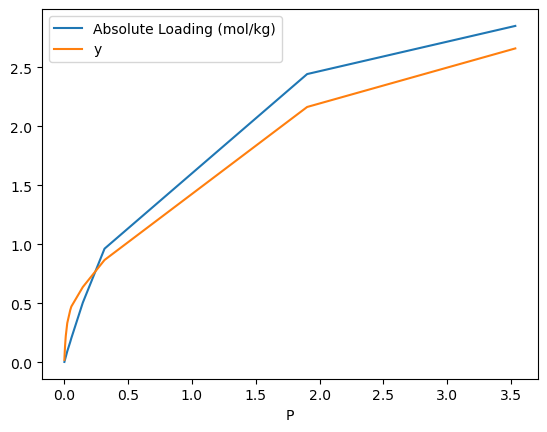

In [16]:
# Plot the P on the x-axis and Absolute Loading (mol/kg) and y on the y-axis
X.plot(x='P', y=['Absolute Loading (mol/kg)', 'y'], kind='line')

## Generate Computational Graph

Computational Graph Generated


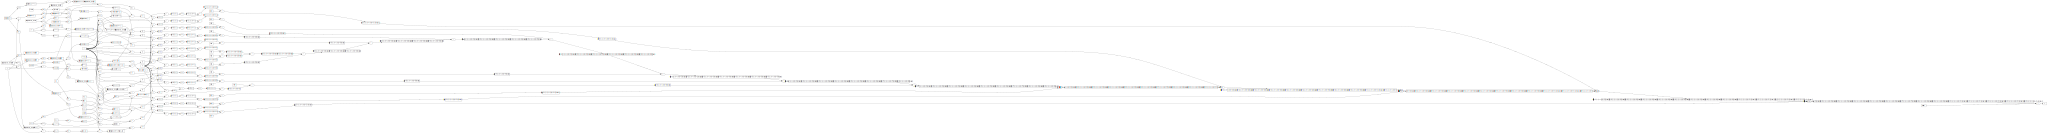

In [17]:
Value.reset()
# Pass in arbitrary values into our function because we are just trying to construct the causal graph
y = co2_373_function(*([0.1] * len(inspect.signature(co2_373_function).parameters)))
target_name = 'y'

computational_graph = draw_computational_graph(y, disable_data_field=True, disable_grad_field=True)
print("Computational Graph Generated")
computational_graph

## Build Causal Graph

[(['(((((P*f12)+1)**-1)*(P*f12))*beta12)', '(((((((((((((((P*f1)+1)**-1)*(P*f1))*beta1)+(((((P*f2)+1)**-1)*(P*f2))*beta2))+(((((P*f3)+1)**-1)*(P*f3))*beta3))+(((((P*f4)+1)**-1)*(P*f4))*beta4))+(((((P*f5)+1)**-1)*(P*f5))*beta5))+(((((P*f6)+1)**-1)*(P*f6))*beta6))+(((((P*f7)+1)**-1)*(P*f7))*beta7))+(((((P*f8)+1)**-1)*(P*f8))*beta8))+(((((P*f9)+1)**-1)*(P*f9))*beta9))+(((((P*f10)+1)**-1)*(P*f10))*beta10))+(((((P*f11)+1)**-1)*(P*f11))*beta11))'], ['((((((((((((((((P*f1)+1)**-1)*(P*f1))*beta1)+(((((P*f2)+1)**-1)*(P*f2))*beta2))+(((((P*f3)+1)**-1)*(P*f3))*beta3))+(((((P*f4)+1)**-1)*(P*f4))*beta4))+(((((P*f5)+1)**-1)*(P*f5))*beta5))+(((((P*f6)+1)**-1)*(P*f6))*beta6))+(((((P*f7)+1)**-1)*(P*f7))*beta7))+(((((P*f8)+1)**-1)*(P*f8))*beta8))+(((((P*f9)+1)**-1)*(P*f9))*beta9))+(((((P*f10)+1)**-1)*(P*f10))*beta10))+(((((P*f11)+1)**-1)*(P*f11))*beta11))+(((((P*f12)+1)**-1)*(P*f12))*beta12))'], [<function op_to_function.<locals>.add at 0x16ca5b600>]), (['(((((((P*f1)+1)**-1)*(P*f1))*beta1)+(((((P*f2)+1

0it [00:00, ?it/s]


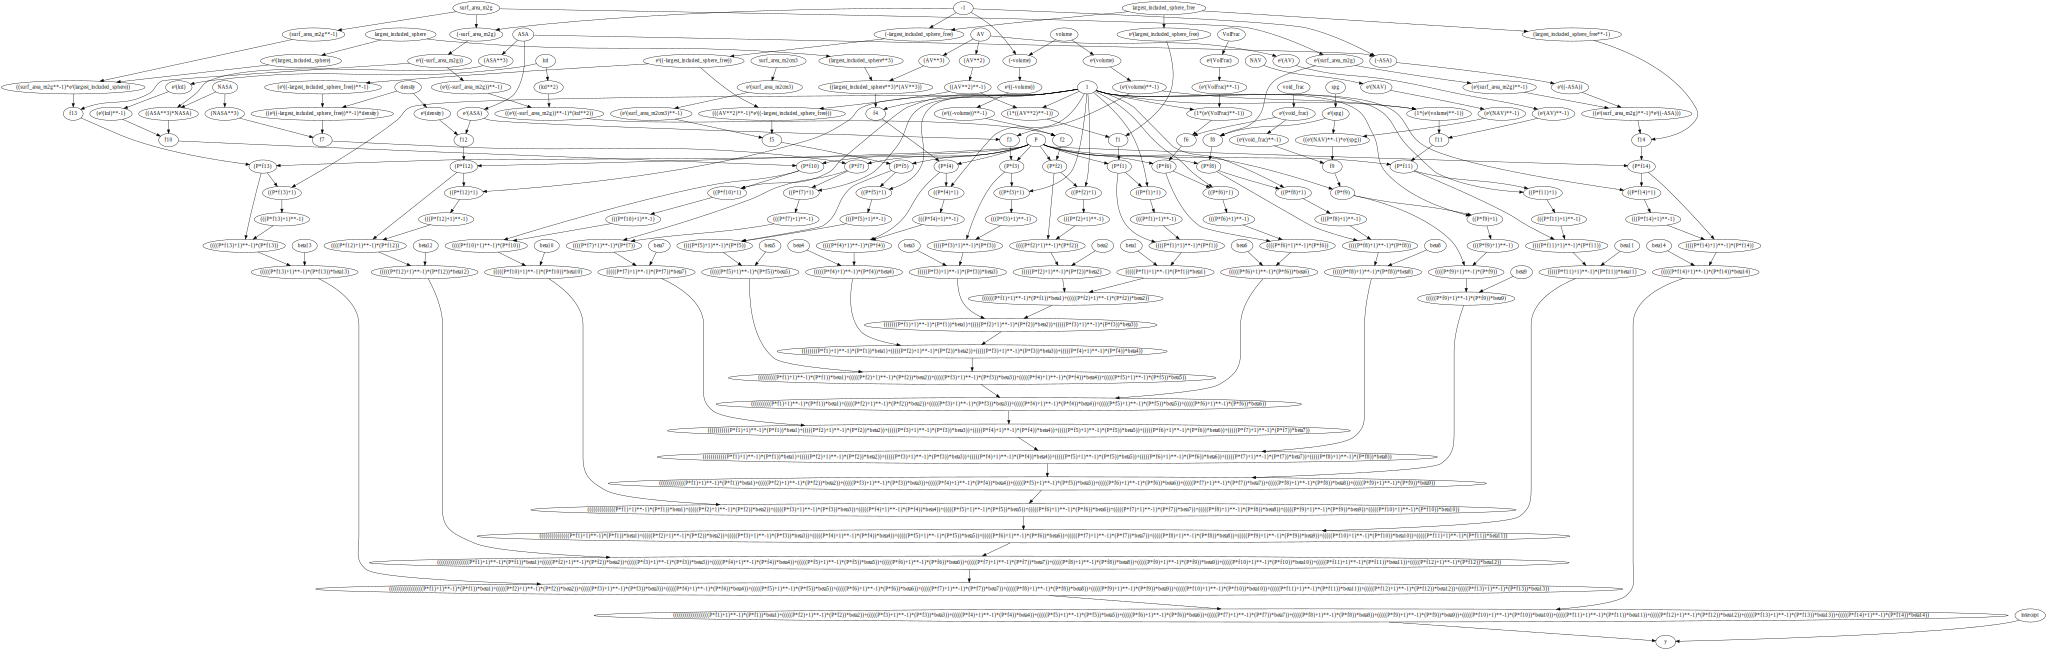

In [18]:
X = X.drop(labels=['y'], axis=1)

causal_graph = build_causal_graph(y, X, target_name, debug=False)
causal_graph.draw(rankdir='TB')

## Shapley Flow Analysis

### Holding Pressure Constant

In [19]:
nruns = 100 # number of monte carlo samples
sample_ind = 0
random_catalyst = random.choice(list(co2.keys())) # Sample a random catalyst
bg = co2[random_catalyst][373].sample(1).drop(labels=['y'], axis=1) # background sample, no need for multiple sample because of the linearity axiom
bg_pressure_value = bg['P'].iloc[0]
fg = X[X['P'] == bg_pressure_value] # foreground samples to explain. Selecting row from X such that the pressure value is equal to the pressure value of bg
bg = bg[fg.columns] # ensure fg and bg have same column order. NOTE: this only works when there is 1 fg

In [20]:
print(random_catalyst)
bg

RWR


,temperature,P,Absolute Loading (mol/kg),density,spg,volume,SiOSi_average,SiOSi_gmean,SiOSi_hmean,SiOSi_max,...,e^((-ASA)),(e^(surf_area_m2g)**-1),((e^(surf_area_m2g)**-1)*e^((-ASA))),f14,(P*f14),((P*f14)+1),(((P*f14)+1)**-1),((((P*f14)+1)**-1)*(P*f14)),(((((P*f14)+1)**-1)*(P*f14))*beta14),((((((((((((((((((P*f1)+1)**-1)*(P*f1))*beta1)+(((((P*f2)+1)**-1)*(P*f2))*beta2))+(((((P*f3)+1)**-1)*(P*f3))*beta3))+(((((P*f4)+1)**-1)*(P*f4))*beta4))+(((((P*f5)+1)**-1)*(P*f5))*beta5))+(((((P*f6)+1)**-1)*(P*f6))*beta6))+(((((P*f7)+1)**-1)*(P*f7))*beta7))+(((((P*f8)+1)**-1)*(P*f8))*beta8))+(((((P*f9)+1)**-1)*(P*f9))*beta9))+(((((P*f10)+1)**-1)*(P*f10))*beta10))+(((((P*f11)+1)**-1)*(P*f11))*beta11))+(((((P*f12)+1)**-1)*(P*f12))*beta12))+(((((P*f13)+1)**-1)*(P*f13))*beta13))+(((((P*f14)+1)**-1)*(P*f14))*beta14))
32,373,3.533428,3.467601,1.347209,0.748327,-1.071215,0.625576,0.591415,0.554924,0.962346,...,2.364076,3.605997,8.524851,-7.628384,-26.954345,-25.954345,-0.038529,1.038529,-0.00006,2.716945


In [21]:
fg

,temperature,P,Absolute Loading (mol/kg),density,spg,volume,SiOSi_average,SiOSi_gmean,SiOSi_hmean,SiOSi_max,...,e^((-ASA)),(e^(surf_area_m2g)**-1),((e^(surf_area_m2g)**-1)*e^((-ASA))),f14,(P*f14),((P*f14)+1),(((P*f14)+1)**-1),((((P*f14)+1)**-1)*(P*f14)),(((((P*f14)+1)**-1)*(P*f14))*beta14),((((((((((((((((((P*f1)+1)**-1)*(P*f1))*beta1)+(((((P*f2)+1)**-1)*(P*f2))*beta2))+(((((P*f3)+1)**-1)*(P*f3))*beta3))+(((((P*f4)+1)**-1)*(P*f4))*beta4))+(((((P*f5)+1)**-1)*(P*f5))*beta5))+(((((P*f6)+1)**-1)*(P*f6))*beta6))+(((((P*f7)+1)**-1)*(P*f7))*beta7))+(((((P*f8)+1)**-1)*(P*f8))*beta8))+(((((P*f9)+1)**-1)*(P*f9))*beta9))+(((((P*f10)+1)**-1)*(P*f10))*beta10))+(((((P*f11)+1)**-1)*(P*f11))*beta11))+(((((P*f12)+1)**-1)*(P*f12))*beta12))+(((((P*f13)+1)**-1)*(P*f13))*beta13))+(((((P*f14)+1)**-1)*(P*f14))*beta14))
32,373,3.533428,2.850372,0.320074,-0.676579,-0.348657,0.540045,0.565635,0.590252,-0.287646,...,0.7734,1.051058,0.812888,-39.70081,-140.279947,-139.279947,-0.00718,1.00718,-0.000059,2.659677


bruteforce sampling: 100%|██████████| 100/100 [00:01<00:00, 76.39it/s]


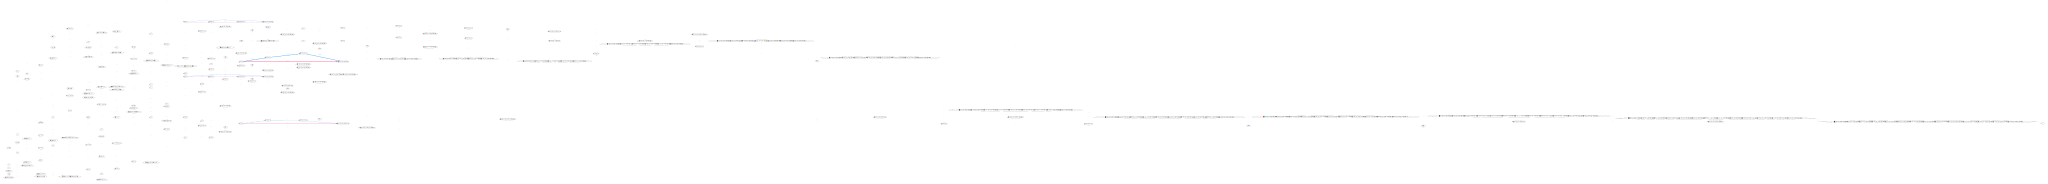

In [22]:
cf_flow = GraphExplainer(causal_graph, bg, nruns=nruns).shap_values(fg, rankdir='LR')
cf_flow.fold_noise = True
shapflow_graph_with_constant_pressure = cf_flow.draw(sample_ind, show_fg_val=False)#, rankdir='TB')

### Holding Catalyst Constant

In [23]:
nruns = 100 # number of monte carlo samples
sample_ind = 0
samples = X.sample(2)
bg = samples.iloc[0:1]
fg = samples.iloc[1:]

In [24]:
bg

,temperature,P,Absolute Loading (mol/kg),density,spg,volume,SiOSi_average,SiOSi_gmean,SiOSi_hmean,SiOSi_max,...,e^((-ASA)),(e^(surf_area_m2g)**-1),((e^(surf_area_m2g)**-1)*e^((-ASA))),f14,(P*f14),((P*f14)+1),(((P*f14)+1)**-1),((((P*f14)+1)**-1)*(P*f14)),(((((P*f14)+1)**-1)*(P*f14))*beta14),((((((((((((((((((P*f1)+1)**-1)*(P*f1))*beta1)+(((((P*f2)+1)**-1)*(P*f2))*beta2))+(((((P*f3)+1)**-1)*(P*f3))*beta3))+(((((P*f4)+1)**-1)*(P*f4))*beta4))+(((((P*f5)+1)**-1)*(P*f5))*beta5))+(((((P*f6)+1)**-1)*(P*f6))*beta6))+(((((P*f7)+1)**-1)*(P*f7))*beta7))+(((((P*f8)+1)**-1)*(P*f8))*beta8))+(((((P*f9)+1)**-1)*(P*f9))*beta9))+(((((P*f10)+1)**-1)*(P*f10))*beta10))+(((((P*f11)+1)**-1)*(P*f11))*beta11))+(((((P*f12)+1)**-1)*(P*f12))*beta12))+(((((P*f13)+1)**-1)*(P*f13))*beta13))+(((((P*f14)+1)**-1)*(P*f14))*beta14))
27,373,0.046369,0.171927,0.320074,-0.676579,-0.348657,0.540045,0.565635,0.590252,-0.287646,...,0.7734,1.051058,0.812888,-39.70081,-1.840905,-0.840905,-1.189196,2.189196,-0.000127,0.441212


In [25]:
fg

,temperature,P,Absolute Loading (mol/kg),density,spg,volume,SiOSi_average,SiOSi_gmean,SiOSi_hmean,SiOSi_max,...,e^((-ASA)),(e^(surf_area_m2g)**-1),((e^(surf_area_m2g)**-1)*e^((-ASA))),f14,(P*f14),((P*f14)+1),(((P*f14)+1)**-1),((((P*f14)+1)**-1)*(P*f14)),(((((P*f14)+1)**-1)*(P*f14))*beta14),((((((((((((((((((P*f1)+1)**-1)*(P*f1))*beta1)+(((((P*f2)+1)**-1)*(P*f2))*beta2))+(((((P*f3)+1)**-1)*(P*f3))*beta3))+(((((P*f4)+1)**-1)*(P*f4))*beta4))+(((((P*f5)+1)**-1)*(P*f5))*beta5))+(((((P*f6)+1)**-1)*(P*f6))*beta6))+(((((P*f7)+1)**-1)*(P*f7))*beta7))+(((((P*f8)+1)**-1)*(P*f8))*beta8))+(((((P*f9)+1)**-1)*(P*f9))*beta9))+(((((P*f10)+1)**-1)*(P*f10))*beta10))+(((((P*f11)+1)**-1)*(P*f11))*beta11))+(((((P*f12)+1)**-1)*(P*f12))*beta12))+(((((P*f13)+1)**-1)*(P*f13))*beta13))+(((((P*f14)+1)**-1)*(P*f14))*beta14))
28,373,0.055067,0.204187,0.320074,-0.676579,-0.348657,0.540045,0.565635,0.590252,-0.287646,...,0.7734,1.051058,0.812888,-39.70081,-2.186209,-1.186209,-0.843022,1.843022,-0.000107,0.471917


bruteforce sampling: 100%|██████████| 100/100 [00:01<00:00, 76.24it/s]


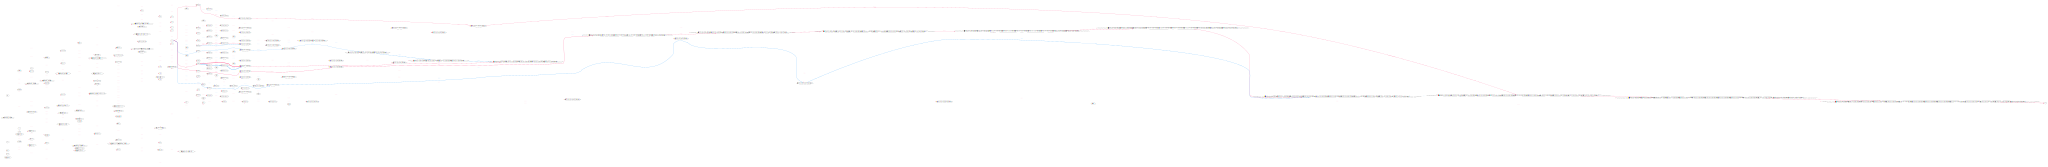

In [26]:
cf_flow = GraphExplainer(causal_graph, bg, nruns=nruns).shap_values(fg, rankdir='LR')
cf_flow.fold_noise = True
shapflow_graph_with_constant_catalyst = cf_flow.draw(sample_ind, show_fg_val=False)#, rankdir='TB')

### Simplified Shapley Flow With f Terms Only

In [27]:
def langmuir_transformation(f, P):
    return (f*P)/(1 + f*P)

0it [00:00, ?it/s]


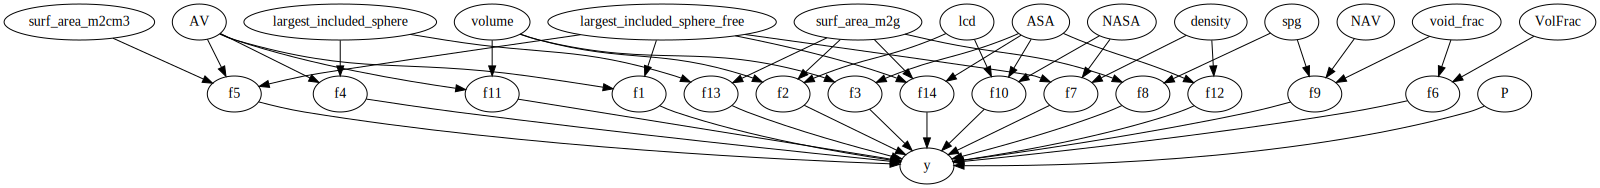

random_catalyst='JSW'


bruteforce sampling: 100%|██████████| 100/100 [00:00<00:00, 327.30it/s]


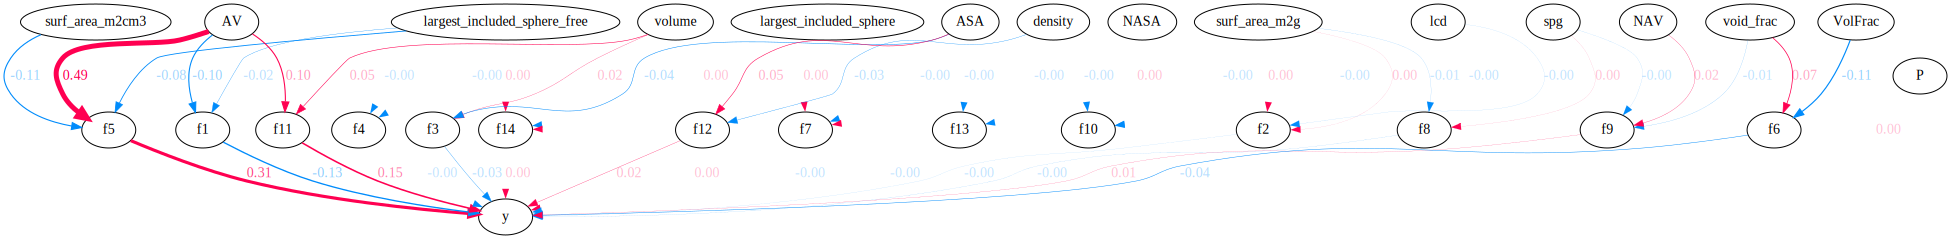

In [28]:
# constants
beta1  = -0.3594413972218853
beta2  = 0.7236283377256563
beta3  = -2.491688880718375
beta4  = 0.09275076505414136
beta5  = 0.9655176044485131
beta6  = 6.602116824421418
beta7  = -8.506535242975505e-06
beta8  = -1.613293940314934
beta9  = 1.275887158343305
beta10 = -4.973935475022366e-06
beta11 = -3.3528986757269825
beta12 = 2.5511241106011875
beta13 = 0.00015360330426490517
beta14 = -5.8135254289460757e-05
constants = [beta1, beta2, beta3, beta4, beta5, beta6, beta7, beta8, beta9, beta10, beta11, beta12, beta13, beta14]

causal_links = CausalLinks()
target_name = 'y'
X_with_only_f_terms = X[['P', 'density', 'spg', 'volume', 'SiOSi_average', 'SiOSi_gmean', 'SiOSi_hmean', 'SiOSi_max', 'SiOSi_mean', 'SiOSi_min', 'SiOSi_skew', 'SiOSi_std', 'SiOSi_var', 'SiO_average', 'SiO_gmean', 'SiO_hmean', 'SiO_max', 'SiO_mean', 'SiO_min', 'SiO_skew', 'SiO_std', 'SiO_var', 'ASA', 'AV', 'NASA', 'NAV', 'VolFrac', 'largest_free_sphere', 'largest_included_sphere', 'largest_included_sphere_free', 'max_dim', 'min_dim', 'mode_dim', 'pld', 'lcd', 'void_frac', 'surf_area_m2g', 'surf_area_m2cm3', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14']]
causal_links.add_causes_effects(
    ['P', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14'],
    target_name,
    lambda P, *features: sum([beta * langmuir_transformation(f, P) for (beta, f) in zip(constants, features)]),
)

causal_links.add_causes_effects(['AV', 'largest_included_sphere_free'], ['f1'], lambda AV, largest_included_sphere_free: 1/((AV)**2)*np.exp(largest_included_sphere_free))
causal_links.add_causes_effects(['lcd', 'surf_area_m2g', 'volume'], ['f2'], lambda lcd, surf_area_m2g, volume : ((lcd)**2)/np.exp(-surf_area_m2g)/np.exp(-volume))
causal_links.add_causes_effects(['ASA', 'volume'], ['f3'], lambda ASA, volume : np.exp(ASA)/np.exp(volume))
causal_links.add_causes_effects(['AV', 'largest_included_sphere'], ['f4'], lambda AV, largest_included_sphere : ((AV)**3)*((largest_included_sphere)**3))
causal_links.add_causes_effects(['largest_included_sphere_free', 'AV', 'surf_area_m2cm3'], ['f5'], lambda largest_included_sphere_free, AV, surf_area_m2cm3 : np.exp(-largest_included_sphere_free)/((AV)**2)/np.exp(surf_area_m2cm3))
causal_links.add_causes_effects(['VolFrac', 'void_frac'], ['f6'], lambda VolFrac, void_frac : 1/np.exp(VolFrac)*np.exp(void_frac))
causal_links.add_causes_effects(['density', 'largest_included_sphere_free', 'NASA'], ['f7'], lambda density, largest_included_sphere_free, NASA : (density)/np.exp(-largest_included_sphere_free)*((NASA)**3))
causal_links.add_causes_effects(['spg', 'surf_area_m2g'], ['f8'], lambda spg, surf_area_m2g : np.exp(spg)*np.exp(surf_area_m2g))
causal_links.add_causes_effects(['spg', 'NAV', 'void_frac'], ['f9'], lambda spg, NAV, void_frac : np.exp(spg)/np.exp(NAV)/np.exp(void_frac))
causal_links.add_causes_effects(['NASA', 'ASA', 'lcd'], ['f10'], lambda NASA, ASA, lcd : (NASA)*((ASA)**3)/np.exp(lcd))
causal_links.add_causes_effects(['volume', 'AV'], ['f11'], lambda volume, AV : 1/np.exp(volume)/np.exp(AV))
causal_links.add_causes_effects(['density', 'ASA'], ['f12'], lambda density, ASA : np.exp(density)*np.exp(ASA))
causal_links.add_causes_effects(['largest_included_sphere', 'surf_area_m2g'], ['f13'], lambda largest_included_sphere, surf_area_m2g : np.exp(largest_included_sphere)/(surf_area_m2g)*np.exp(-surf_area_m2g))
causal_links.add_causes_effects(['ASA', 'surf_area_m2g', 'largest_included_sphere_free'], ['f14'], lambda ASA, surf_area_m2g, largest_included_sphere_free : np.exp(-ASA)/np.exp(surf_area_m2g)/(largest_included_sphere_free))

causal_graph_simplified = build_feature_graph(X_with_only_f_terms, causal_links, target_name=target_name)
causal_graph_simplified.draw(rankdir='TB')

nruns = 100 # number of monte carlo samples
sample_ind = 0
random_catalyst = random.choice(list(co2.keys())) # Sample a random catalyst
print(f'{random_catalyst=}')

bg = co2[random_catalyst][373].sample(1).drop(labels=['y'], axis=1) # background sample, no need for multiple sample because of the linearity axiom
bg_pressure_value = bg['P'].iloc[0]
fg = X_with_only_f_terms[X_with_only_f_terms['P'] == bg_pressure_value] # foreground samples to explain. Selecting row from X such that the pressure value is equal to the pressure value of bg
bg = bg[fg.columns] # ensure fg and bg have same column order. NOTE: this only works when there is 1 fg

cf_flow = GraphExplainer(causal_graph_simplified, bg, nruns=nruns).shap_values(fg, rankdir='TB')

cf_flow.fold_noise = True
shapflow_graph_simplified = cf_flow.draw(sample_ind, show_fg_val=False)#, rankdir='TB')

## Save Results

In [30]:
dir_name = 'co2'
save_dir = f'results/{dir_name}'
os.makedirs(save_dir, exist_ok=True)

computational_graph.render(os.path.join(save_dir, 'computational_graph'), format='png')
causal_graph.to_graphviz(rankdir='LR').draw(
    path=os.path.join(save_dir, 'causal_graph.png'),
    format='png',
    prog='dot'
)
causal_graph_simplified.to_graphviz(rankdir='LR').draw(
    path=os.path.join(save_dir, 'causal_graph_simplified.png'),
    format='png',
    prog='dot'
)
shapflow_graph_with_constant_pressure.draw(
    path=os.path.join(save_dir, 'shapflow_graph_with_constant_pressure.png'),
    format='png',
    prog='dot'
)
shapflow_graph_with_constant_catalyst.draw(
    path=os.path.join(save_dir, 'shapflow_graph_with_constant_catalyst.png'),
    format='png',
    prog='dot'
)
shapflow_graph_simplified.draw(
    path=os.path.join(save_dir, 'shapflow_graph_simplified.png'),
    format='png',
    prog='dot'
)
print("All graphs have been saved to:", save_dir)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.888838 to fit
/Users/davebanerjee/anaconda3/lib/python3.11/site-packages/pygraphviz/agraph.py:1403: RuntimeWarning: dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.777519 to fit

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
/Users/davebanerjee/anaconda3/lib/python3.11/site-packages/pygraphviz/agraph.py:1403: RuntimeWarning: dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.679757 to fit

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)
/Users/davebanerjee/anaconda3/lib/python3.11/site-packages/pygraphviz/agraph.py:1403: RuntimeWarning: dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.682475 to fit

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


All graphs have been saved to: results/co2
